In [1]:
from qiskit import *
from qiskit_aer import StatevectorSimulator
from qiskit.visualization import plot_bloch_multivector
import random

<h1>Deustsh Algorithm</h1>
<p>The Deutsch approach helps identify if a Boolean function is constant (all 0s or all 1s) or balanced (half 0s and half 1s) by analyzing its input-output patterns.</p>
<p>In this algorithm we are introduced to the idea of a Oracle $U_f$, a unitary operation that will answer if a $f(0) \oplus f(1).$ </p>
<p> A $f(0) \oplus f(1)$ operation is $[f(0) + f(1)]\;mod\,2 $. $f(0)$, so we have the following possible results: </p>

| $f(0)$ | $f(1)$ | $U_f$ |
|--------|--------|-------|
| 0      | 0      | 0     |
| 0      | 1      | 1     |
| 1      | 0      | 1     |
| 1      | 1      | 0     | 

<p>Classicaly, we would need to check the oracle two times to solve the question, but if we make use of the superposition, we can check it only once.</p>
 <p>So, the first step is to superpose the states with the Hadamard gate on the states $\ket{+}$ and $\ket{-}$ so the qubits have 50% chances of being 0 or 1.</p>
 <p>$\ket{x}$ can be represented with $n$ qubits, $\ket{y}$ is a work qubit.</p>

C:\Users\mathe\AppData\Local\Programs\Python\Python310\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


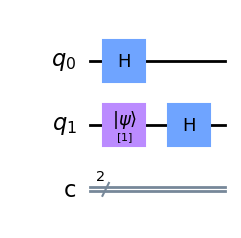

In [2]:
dc = QuantumCircuit(2, 2)
dc.initialize(1,1)
dc.h(0)
dc.h(1)
dc.draw("mpl")

<p>The next step is to implement the Oracle, so, let's check how it should work:</p>
<p>The state $\ket{+}$ on $q_0$ is the $\ket{x}$</p>
<p>The state $\ket{-}$ on $q_1$ is the $\ket{y}$</p>

![Oracle scheme](img/deustch_01.png)

<p> To the case where $f(0) = f(1) = 0$ we apply the identity to $\ket{y}$ because $\ket{y} \oplus 0$ is always $\ket{y}$</p>


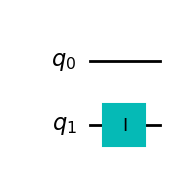

In [3]:
oracle = QuantumCircuit(2)
oracle.id(1)
oracle.draw("mpl")

<p>In the case where $f(0) = f(1) = 1$ we apply the bit flip to $\ket{y}$ because $\ket{y} \oplus 1$ is always $!\ket{y}$</p>

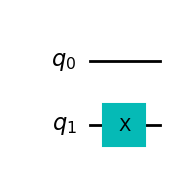

In [4]:
oracle = QuantumCircuit(2)
oracle.x(1)
oracle.draw("mpl")

<p>When $f(0) = 0$ and $f(1) = 1$, CNOT is applied on $\ket{y}$, controlled by $\ket{x}$ because $\ket{y} \oplus f(x)$ depends on the value of $\ket{x}$</p>

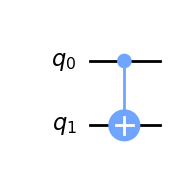

In [5]:
oracle = QuantumCircuit(2)
oracle.cx(0,1)
oracle.draw("mpl")

<p>When $f(0) = 1$ and $f(1) = 0$, $\ket{x}$ must be flipped and then unflipped after a CNOT is applied on $\ket{y}$, controlled by $\ket{x}$ because $\ket{y} \oplus f(x)$ depends on the value of $\ket{x}$</p>

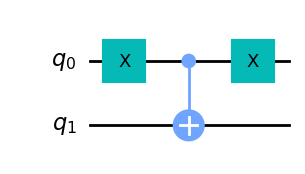

In [6]:
oracle = QuantumCircuit(2)
oracle.x(0)
oracle.cx(0,1)
oracle.x(0)
oracle.draw("mpl")

<p>Now, we randomly choose one of the implementations of the Oracle to run the algorithm and then disocver in one execution the case of the functions</p>

In [7]:
cases = ['constant', 'balanced']

In [8]:
def deutsch_oracle(case):
    oracle = QuantumCircuit(2)
    c = random.randint(1,2)
    if case == 'constant':
        if c == 1:
            oracle.i(1)
        else:
            oracle.x(1)
    elif case == 'balanced':
        if c == 1:
            oracle.cx(0,1)
        else:
            oracle.x(0)
            oracle.cx(0,1)
            oracle.x(0)
    return oracle

In [9]:
chosen_case = random.choice(cases)
print(chosen_case)

constant


In [10]:
gate = deutsch_oracle(chosen_case).to_gate()
gate.name = 'Uf'

C:\Users\mathe\AppData\Local\Temp\ipykernel_13856\623332247.py:6: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.id as direct replacement.
  oracle.i(1)


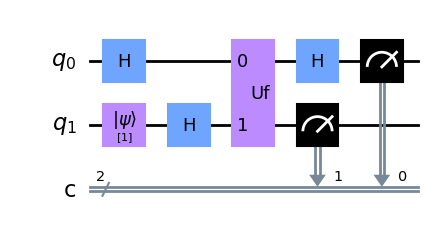

In [11]:
dc.append(gate, [0, 1])
dc.h(0)
dc.measure(0,0)
dc.measure(1,1)
dc.draw("mpl")

In [12]:
simulator = StatevectorSimulator()
dc = transpile(dc, simulator)
result = execute(dc, simulator).result()
counts = result.get_counts()
print(counts)

{'10': 1}


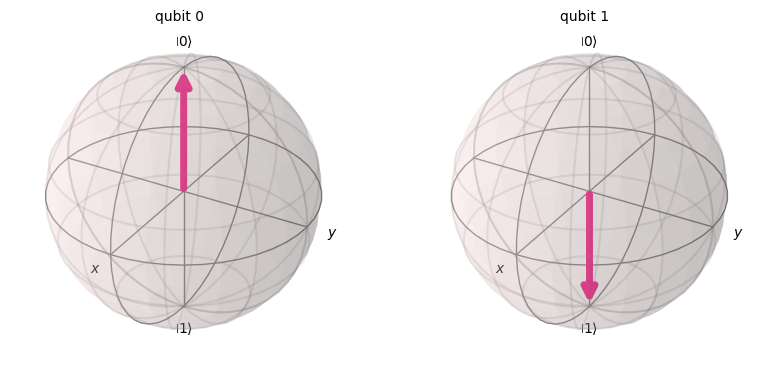

In [13]:
state_vector = result.get_statevector()
plot_bloch_multivector(state_vector)

In [14]:
isBalanced = list(counts)[0][1]
if isBalanced == '1':
    print('BALANCED')
else:
    print('CONSTANT')

CONSTANT


<p>The Deutsch algorithm, though lacking practical real-world applications, was intentionally created to showcase the potential superiority of quantum computers over classical ones in certain problem-solving scenarios. It highlights that quantum computers may excel in addressing specific challenges compared to traditional counterparts.</p>